**Download dataset from kaggle**

In [58]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [59]:
# importing required modules
from zipfile import ZipFile

# specifying the zip file name
file_name = "customer-segmentation-tutorial-in-python.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
	# printing all the contents of the zip file
	zip.printdir()

	# extracting all the files
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')


File Name                                             Modified             Size
Mall_Customers.csv                             2019-10-03 14:10:00         3981
Extracting all the files now...
Done!


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 125


In [3]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [5]:
print("--------------------------------------------------------------------------------------//")
df.info()
print("--------------------------------------------------------------------------------------//")
print(df.describe)

--------------------------------------------------------------------------------------//
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
--------------------------------------------------------------------------------------//
<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16   

**Rename Column**

In [6]:
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"})

##### Age Distribution

In [7]:
bins = range(18, 80, 5)

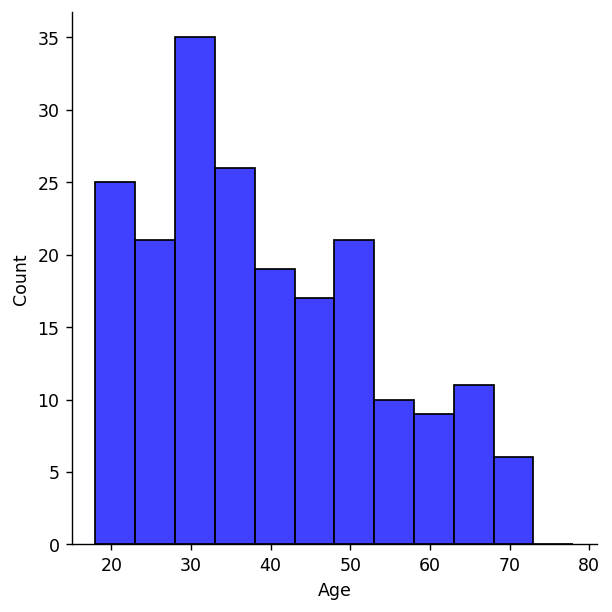

In [8]:
sns.displot(df.Age, color='blue', kde=False, bins=bins, label='Existing')

##### Age & Gender Stacked Bar Graph

<AxesSubplot:xlabel='Age'>

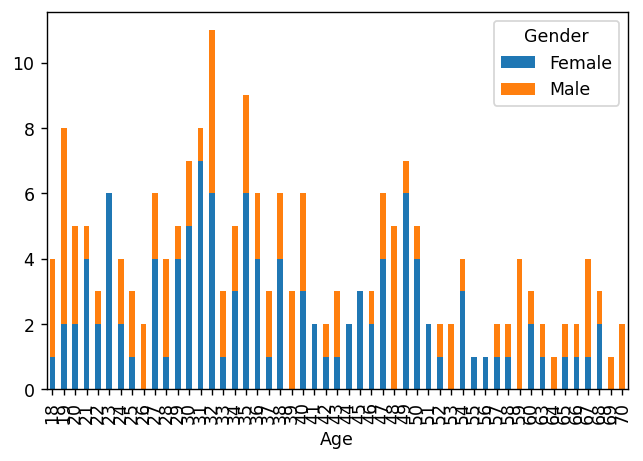

In [9]:
counts = df.groupby(['Age', 'Gender']).Age.count().unstack()
counts.plot(kind='bar', stacked=True)

#### Freq Distribution Income & Age

In [10]:
# for label
bins_label= [18,25,35,45,55,65,75,85]
labels = ['18-25','25-35','35-45','45-55','55-65','65-75','75-85']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins_label, labels=labels, right=False)

#for Age
bins_age= [15,25,35,45,55,65,75,85,95,105,115,125,135,145]
df['IncomeGroup'] = pd.cut(df['AnnualIncome'], bins=bins_age, right=False)

#for spending score
bins_spending_score = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
df['SpendingScoreGroups'] = pd.cut(df['SpendingScore'], bins=bins_spending_score, right=False)

<AxesSubplot:xlabel='IncomeGroup'>

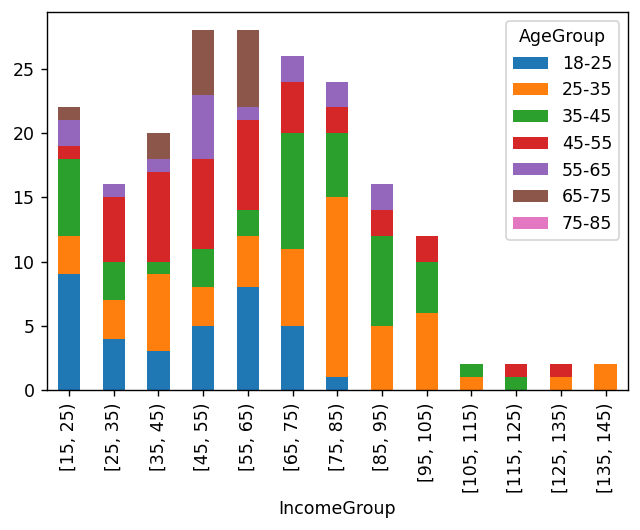

In [14]:
counts = df.groupby(['IncomeGroup', 'AgeGroup']).AgeGroup.count().unstack()
counts.plot(kind='bar', stacked=True)

#### Side by side column graph Income & Gender

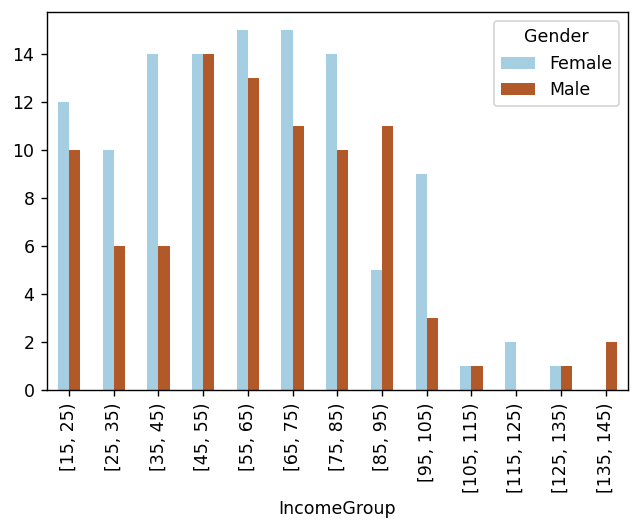

In [15]:
counts = df.groupby(['IncomeGroup', 'Gender']).Age.count().unstack()
ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')
plt.show()

#### Plot Chart

In [13]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,AgeGroup,IncomeGroup,SpendingScoreGroups
0,1,Male,19,15,39,18-25,"[15, 25)","[35, 40)"
1,2,Male,21,15,81,18-25,"[15, 25)","[80, 85)"
2,3,Female,20,16,6,18-25,"[15, 25)","[5, 10)"
3,4,Female,23,16,77,18-25,"[15, 25)","[75, 80)"
4,5,Female,31,17,40,25-35,"[15, 25)","[40, 45)"


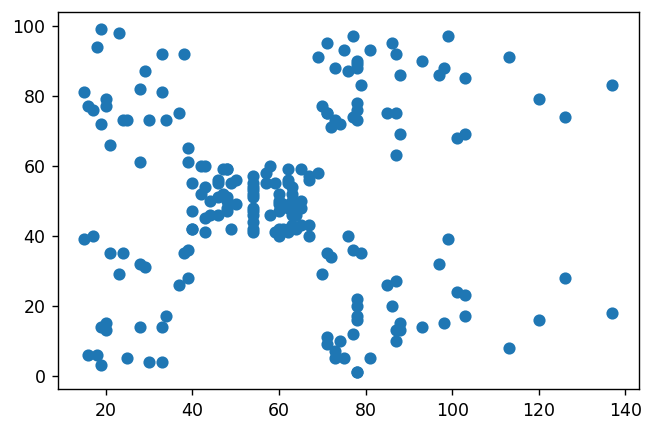

In [19]:
#Annual Income & Spending Score

plt.scatter(x = df['AnnualIncome'], y = df['SpendingScore'])

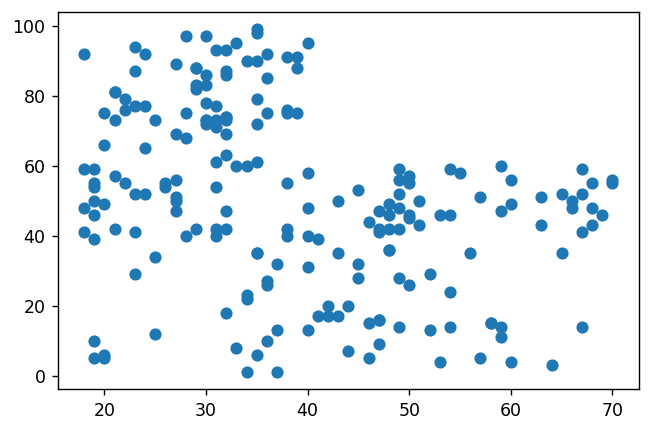

In [20]:
#Age & Spending Score

plt.scatter(x = df['Age'], y = df['SpendingScore'])

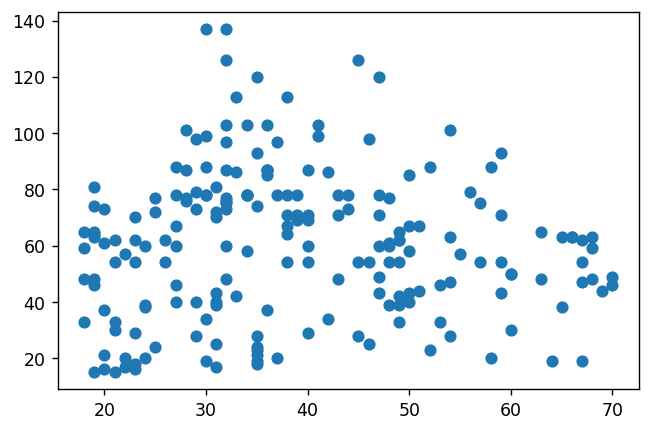

In [21]:
plt.scatter(x = df['Age'], y = df['AnnualIncome'])

We use Annual Income as feature and Spending Score as target


#### Model

In [33]:
from sklearn.cluster import KMeans

D:\Software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


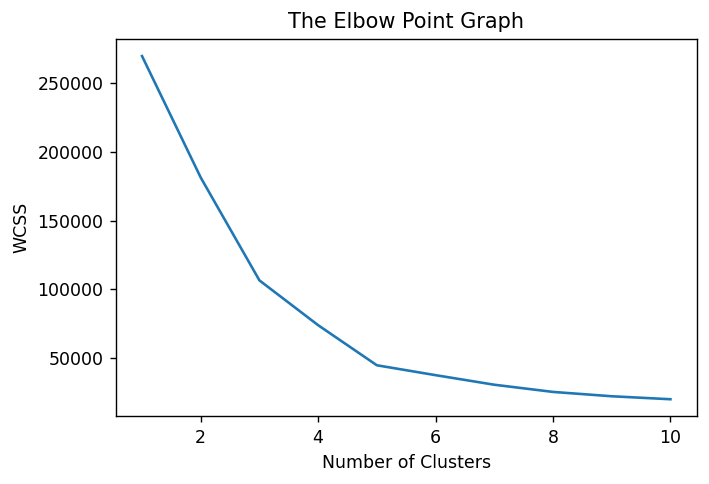

In [34]:

cluster = df.iloc[:,[3,4]].values

# Choosing the number of clusters
# WCSS -> Within Clusters Sum of Squares
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(cluster)

  wcss.append(kmeans.inertia_)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')

plt.show()

Optimum Number of Clusters = 5

**Train Model**

In [35]:
kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(cluster)
print(np.unique(Y))

[0 1 2 3 4]


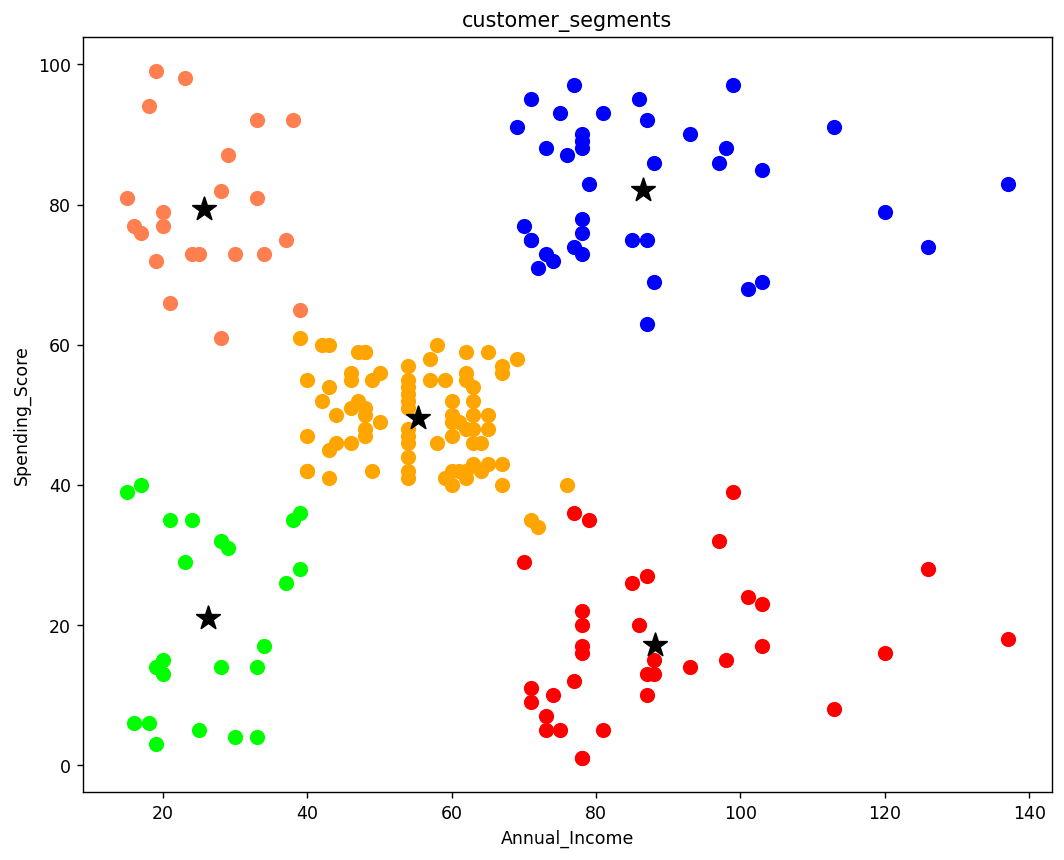

In [53]:
plt.figure(figsize=(10,8))
plt.scatter(cluster[Y==0,0], cluster[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(cluster[Y==1,0], cluster[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(cluster[Y==2,0], cluster[Y==2,1], s=60, c='lime', label='Cluster 3')
plt.scatter(cluster[Y==3,0], cluster[Y==3,1], s=60, c='coral', label='Cluster 4')
plt.scatter(cluster[Y==4,0], cluster[Y==4,1], s=60, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', marker='*')
# sns.scatterplot(data=df, x ='AnnualIncome',y='SpendingScore',hue='Spending and Income Cluster',palette='tab10')
plt.title('customer_segments')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

## Conclusion

- Cluster 4 (Coral) = lower income but spend high --may need to dig in 

- Cluster 5 (Blue) = As we know higher income, spend more, and female-- this is ideal group , we will target in.